# Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder
from io import StringIO
from IPython.display import Image
import pydotplus
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import tree

from sklearn.model_selection import cross_val_score

In [29]:
df = pd.read_csv('data/online_shoppers.csv')

In [30]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,Returning_Visitor,True,False


In [31]:
print(df.shape)

(12330, 14)


**This is a large dataset. With over 1200 instances.**

In [32]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


In [33]:
print(df.Revenue.value_counts())

Revenue
False    10422
True      1908
Name: count, dtype: int64


**The number of each class is different**

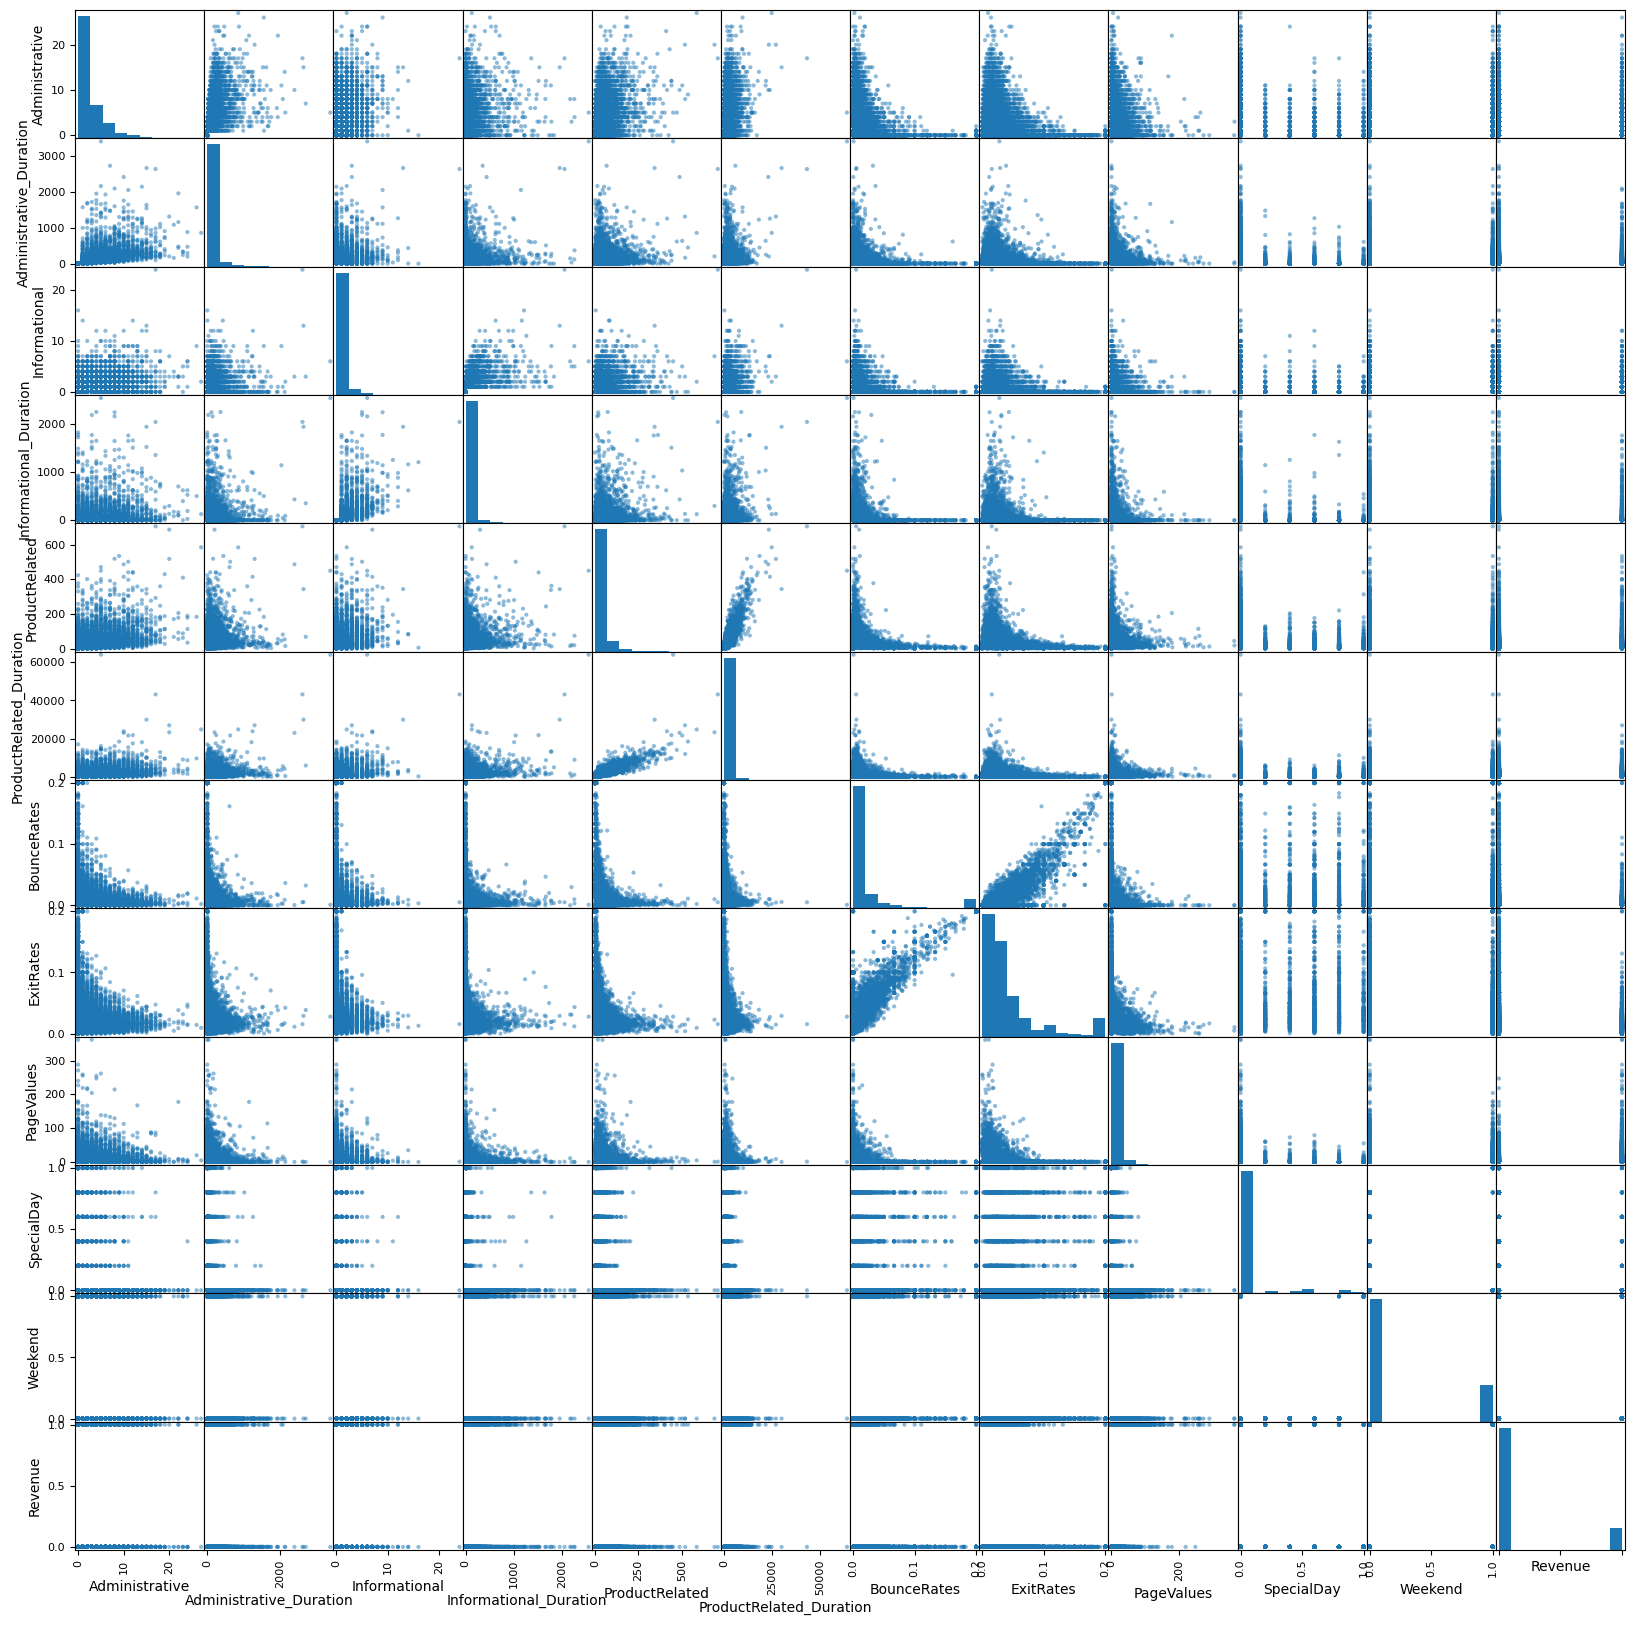

In [34]:
## Assuming df is your DataFrame
df_numeric = df.select_dtypes(include=[np.number])  # Select only numeric columns
df_boolean = df.select_dtypes(include=[bool])  # Select boolean columns

# Convert boolean columns to numeric (0 and 1)
df_numeric_boolean = df_boolean.astype(int)

# Combine numeric columns and converted boolean columns
df_combined = pd.concat([df_numeric, df_numeric_boolean], axis=1)

# Now, use scatter_matrix() with the modified DataFrame
scatter_matrix(df_combined, figsize=(20, 20))

# Remove the labels
plt.tick_params(axis='both', which='both', labelbottom=False, labelleft=False)
plt.savefig('plots/scatter_matrix_of_decision_tree.png')
plt.show()

In [35]:
df_combined.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,1,0


In [36]:
#df = pd.get_dummies(df)
#print(df)
df_combined.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,-0.016767,-0.082305


In [37]:
# Convert DataFrame to NumPy array
np_data = df_combined.to_numpy()
# Save the NumPy array as a CSV file
np.savetxt('outshoppers.csv', np_data, delimiter=',', header=','.join(df_combined.columns), comments='')

# data = np.array(df_combined)
# np.savetxt('outshoppers.csv', df_combined, delimiter=',')
# print(data)

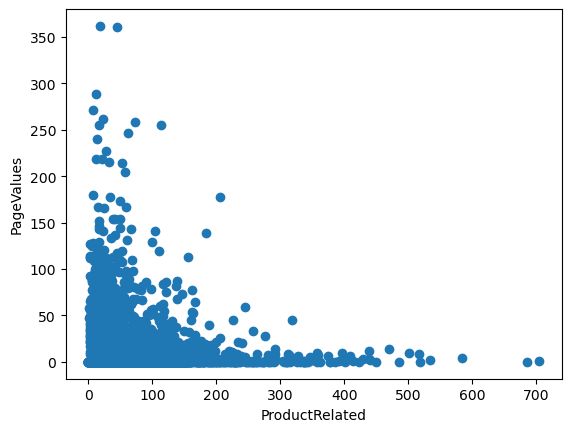

In [38]:
# Lets have a closer look at the bounce rates
plt.scatter(df['ProductRelated'],df['PageValues'])
plt.xlabel('ProductRelated')
plt.ylabel('PageValues')
plt.savefig('plots/scatter_plot_of_decision_tree.png')
plt.show()

**There seems to be seperation between the two values of the revenue columns**

In [39]:
d = df_combined.to_numpy()
print(d[d[:,11] == 1,4])

[ 27.  36.  19. ... 144. 221.  15.]


In [40]:
d = df_combined.to_numpy()
print(d[d[:,11] == 1,8])

[22.9160357  11.43941195 17.53595893 ...  0.          1.58247315
 78.81172527]


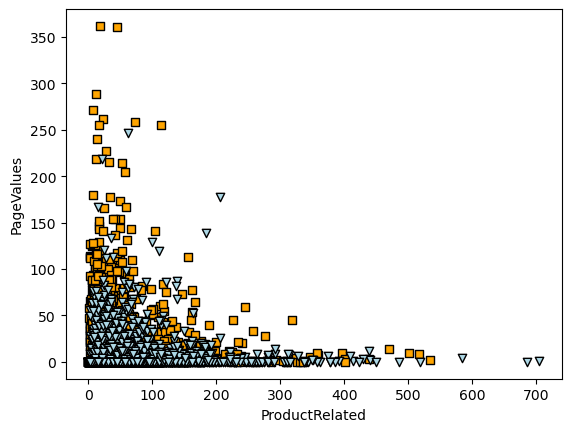

In [41]:
d = np.array(df_combined)
plt.scatter(
    d[d[:,11] == 1,4], d[d[:,11] == 1, 8],
    c='orange', marker = 's', edgecolor='black',
    label='True'
)

plt.scatter(
    d[d[:,11] == 0,4], d[d[:,11] == 0, 8],
    c='lightblue', marker = 'v', edgecolor='black',
    label='False'
)

plt.xlabel('ProductRelated')
plt.ylabel('PageValues')
plt.savefig('plots/color_scatter_plots_of_decision_tree.png')
plt.show()

In [42]:
plt.show()
plt.savefig('plots/color_scatter_plots_of_decision_tree.png')
df_combined.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,1,0


<Figure size 640x480 with 0 Axes>

In [43]:
df_combined.shape

(12330, 12)

In [44]:
X = df_combined.drop('Revenue', axis='columns')
X = pd.get_dummies(X)
y = df_combined['Revenue']
print(X.shape)
print(y.shape)

(12330, 11)
(12330,)


**Seperating the dataset into X and y where the revenue column is the target variable**

In [45]:
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,1


In [46]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Revenue, dtype: int64

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=2)

In [48]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9247, 11)
(9247,)
(3083, 11)
(3083,)


**The sizes of the training and testing sets where choosen to indicate a balanced split, preserving the relative distribution of data between the two sets.**

In [49]:
for d in range(2,10):
    model = DecisionTreeClassifier(max_depth=d, random_state=1)
    scores = cross_val_score(model, X_train, y_train, cv= 5)
    
    print("d: ", d, "validation accuracy", scores.mean())

d:  2 validation accuracy 0.8860172774180345
d:  3 validation accuracy 0.8901262625524389
d:  4 validation accuracy 0.893911566515136
d:  5 validation accuracy 0.8908834285881339
d:  6 validation accuracy 0.8879631648955607
d:  7 validation accuracy 0.8876394837238537
d:  8 validation accuracy 0.8817986639966089
d:  9 validation accuracy 0.8799602999429933


**The highest mean validation accuracy is achieved at a max_depth of 4,**

### Decision Tree Model

In [50]:
label_encoder = LabelEncoder()
# X_train['Month'] = label_encoder.fit_transform(df['Month'])
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)
model.get_depth()

4

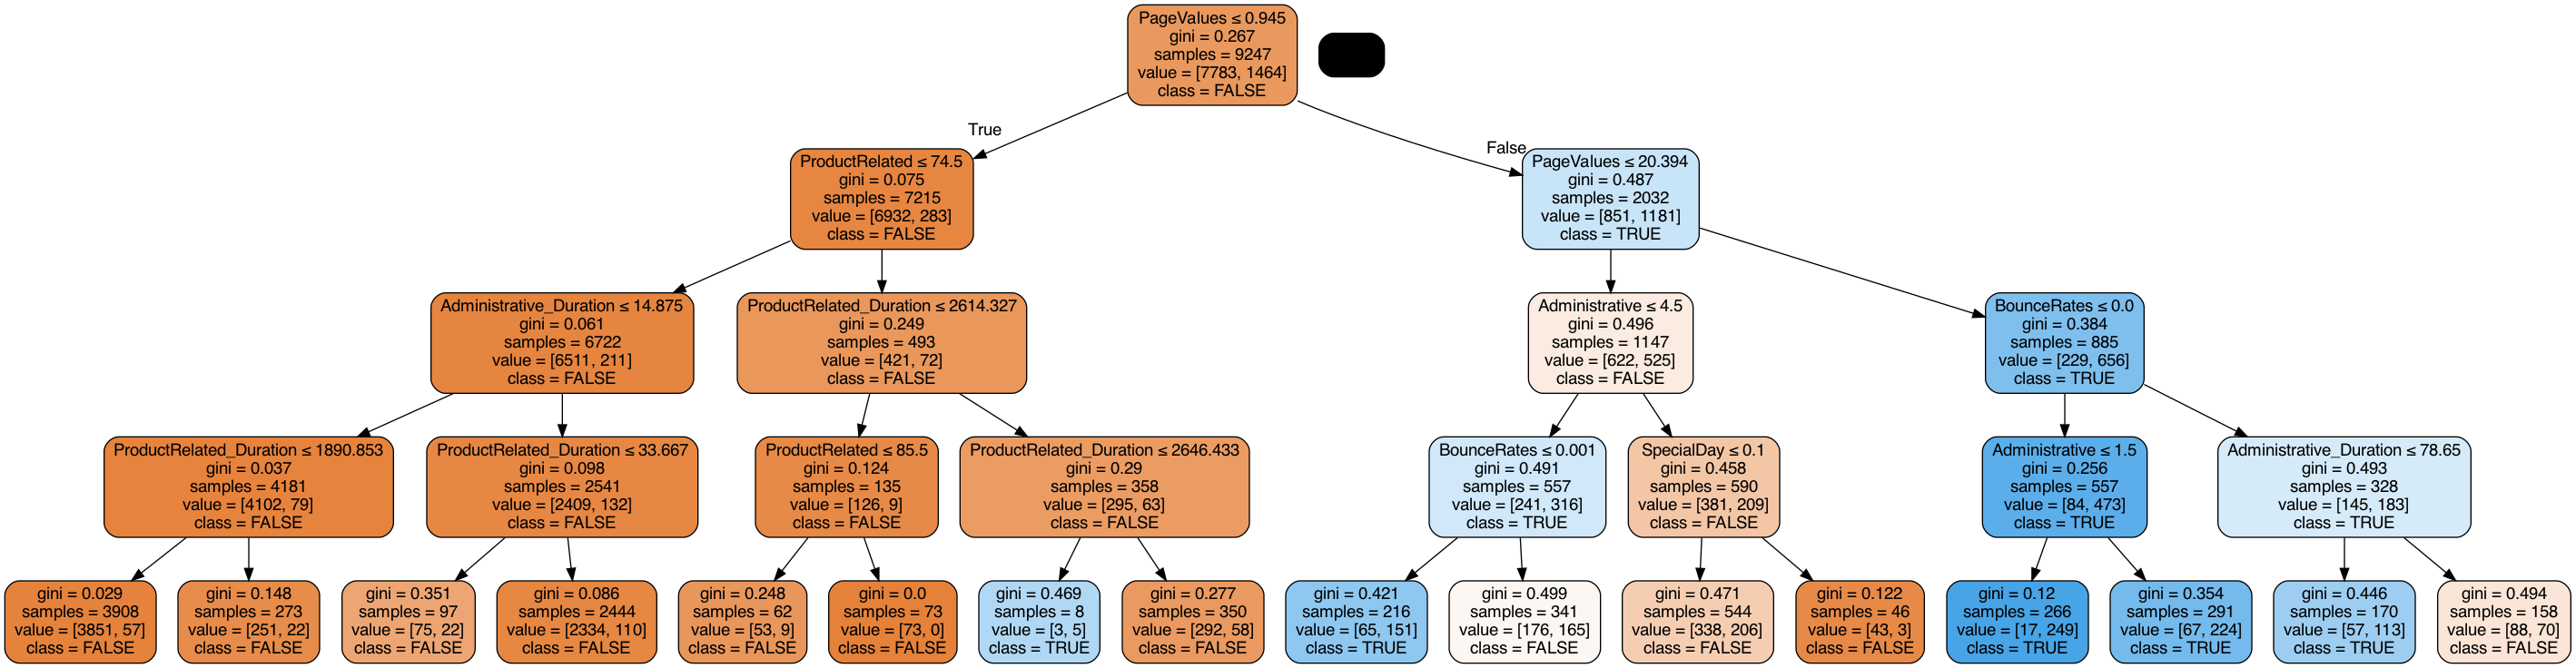

In [51]:
#Draw the tree
feature_names=['Administrative', 'Administrative_Duration','Informational','Informational_Duration',
               'ProductRelated', 'ProductRelated_Duration','BounceRates','ExitRates','PageValues',
               'SpecialDay','Weekend']
target_names=['FALSE', 'TRUE']
dot_data = StringIO()
export_graphviz(model,out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names= feature_names, class_names = target_names)
graph =pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('plots/decision_tree.png')
Image(graph.create_png())

**Predictions on the test set**

In [52]:
ypred = model.predict(X_test)
print(ypred)
ypred.shape

[0 0 0 ... 0 1 0]


(3083,)

### Evaluate the model

**Print the Accuracy Score**

In [53]:
accuracy = accuracy_score(y_test, ypred)
print("Accuracy", accuracy)

Accuracy 0.9000973078170613


**The model shows an high degree of accuracy 90%**

In [54]:
conf_matrix = confusion_matrix(y_test, ypred)
print("Confusion Matrix", conf_matrix)

Confusion Matrix [[2566   73]
 [ 235  209]]


In [55]:
class_report = classification_report(y_test, ypred)
print("Classification Report:\n", class_report)



Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      2639
           1       0.74      0.47      0.58       444

    accuracy                           0.90      3083
   macro avg       0.83      0.72      0.76      3083
weighted avg       0.89      0.90      0.89      3083

